# Jupyter pour l'analyse des données



In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import datetime

# math opeations
# import math
# produce random numbers
# import random
# to load json files
import json
# datetime oprations
from datetime import timedelta
# to get web contents
from urllib.request import urlopen

# for numerical analyiss
import numpy as np
# to store and process data in dataframe
import pandas as pd

# for offline ploting
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
# converter
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# to USA states details
# import us

DEPARTMENTS = {
    '1': 'Ain', 
    '2': 'Aisne', 
    '3': 'Allier', 
    '4': 'Alpes-de-Haute-Provence', 
    '5': 'Hautes-Alpes',
    '6': 'Alpes-Maritimes', 
    '7': 'Ardèche', 
    '8': 'Ardennes', 
    '9': 'Ariège', 
    '10': 'Aube', 
    '11': 'Aude',
    '12': 'Aveyron', 
    '13': 'Bouches-du-Rhône', 
    '14': 'Calvados', 
    '15': 'Cantal', 
    '16': 'Charente',
    '17': 'Charente-Maritime', 
    '18': 'Cher', 
    '19': 'Corrèze', 
    '2A': 'Corse-du-Sud', 
    '2B': 'Haute-Corse',
    '21': 'Côte-d\'Or', 
    '22': 'Côtes-d\'Armor', 
    '23': 'Creuse', 
    '24': 'Dordogne', 
    '25': 'Doubs', 
    '26': 'Drôme',
    '27': 'Eure', 
    '28': 'Eure-et-Loir', 
    '29': 'Finistère', 
    '30': 'Gard', 
    '31': 'Haute-Garonne', 
    '32': 'Gers',
    '33': 'Gironde', 
    '34': 'Hérault', 
    '35': 'Ille-et-Vilaine', 
    '36': 'Indre', 
    '37': 'Indre-et-Loire',
    '38': 'Isère', 
    '39': 'Jura', 
    '40': 'Landes', 
    '41': 'Loir-et-Cher', 
    '42': 'Loire', 
    '43': 'Haute-Loire',
    '44': 'Loire-Atlantique', 
    '45': 'Loiret', 
    '46': 'Lot', 
    '47': 'Lot-et-Garonne', 
    '48': 'Lozère',
    '49': 'Maine-et-Loire', 
    '50': 'Manche', 
    '51': 'Marne', 
    '52': 'Haute-Marne', 
    '53': 'Mayenne',
    '54': 'Meurthe-et-Moselle', 
    '55': 'Meuse', 
    '56': 'Morbihan', 
    '57': 'Moselle', 
    '58': 'Nièvre', 
    '59': 'Nord',
    '60': 'Oise', 
    '61': 'Orne', 
    '62': 'Pas-de-Calais', 
    '63': 'Puy-de-Dôme', 
    '64': 'Pyrénées-Atlantiques',
    '65': 'Hautes-Pyrénées', 
    '66': 'Pyrénées-Orientales', 
    '67': 'Bas-Rhin', 
    '68': 'Haut-Rhin', 
    '69': 'Rhône',
    '70': 'Haute-Saône', 
    '71': 'Saône-et-Loire', 
    '72': 'Sarthe', 
    '73': 'Savoie', 
    '74': 'Haute-Savoie',
    '75': 'Paris', 
    '76': 'Seine-Maritime', 
    '77': 'Seine-et-Marne', 
    '78': 'Yvelines', 
    '79': 'Deux-Sèvres',
    '80': 'Somme', 
    '81': 'Tarn', 
    '82': 'Tarn-et-Garonne', 
    '83': 'Var', 
    '84': 'Vaucluse', 
    '85': 'Vendée',
    '86': 'Vienne', 
    '87': 'Haute-Vienne', 
    '88': 'Vosges', 
    '89': 'Yonne', 
    '90': 'Territoire de Belfort',
    '91': 'Essonne', 
    '92': 'Hauts-de-Seine', 
    '93': 'Seine-Saint-Denis', 
    '94': 'Val-de-Marne', 
    '95': 'Val-d\'Oise',
    '971': 'Guadeloupe', 
    '972': 'Martinique', 
    '973': 'Guyane', 
    '974': 'La Réunion', 
    '976': 'Mayotte',
}

In [17]:
data = pd.read_csv(r"../data/annee_traitee/2022.csv",low_memory=False,sep=";",index_col=0)
data["Date mutation"] = pd.to_datetime(data["Date mutation"], format="%Y-%m-%d")

def departement(row):
    row["Département"] = DEPARTMENTS.get(str(row["Code departement"]))

data["Département"] = data.apply(lambda x: departement(x),axis=1)

In [117]:
display(data)

,Date mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Code departement,Code commune,Section,...,1er lot,Surface Carrez du 1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,Month mutation
0,2022-01-03,55000.0,13.0,RUE,2280,DE LA LIBERTE,1000.0,1,53,AM,...,7.0,24.10,1,2.0,Appartement,24.0,1.0,NaN,NaN,1
1,2022-01-03,143000.0,NaN,NaN,B010,CHAMP COCHET,1480.0,1,398,ZE,...,NaN,NaN,0,NaN,NaN,NaN,NaN,S,84.0,1
2,2022-01-03,143000.0,NaN,NaN,B010,CHAMP COCHET,1480.0,1,398,ZE,...,NaN,NaN,0,NaN,NaN,NaN,NaN,S,88.0,1
3,2022-01-03,143000.0,98.0,RTE,0055,DE LA DOMBES,1480.0,1,398,ZE,...,1.0,123.23,1,2.0,Appartement,140.0,3.0,NaN,NaN,1
4,2022-01-04,300.0,NaN,NaN,B031,AUX PIERRES,1480.0,1,243,A,...,NaN,NaN,0,NaN,NaN,NaN,NaN,T,510.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803880,2022-12-30,3500000.0,19.0,RUE,4879,JEAN DOLENT,75014.0,75,114,AS,...,3,NaN,1,4.0,Local industriel. commercial ou assimilé,327.0,0.0,NaN,NaN,12
3803881,2022-12-19,525000.0,3.0,RUE,3842,FREDERIC MAGISSON,75015.0,75,115,EJ,...,49,46.65,2,3.0,Dépendance,0.0,0.0,NaN,NaN,12
3803882,2022-12-19,525000.0,3.0,RUE,3842,FREDERIC MAGISSON,75015.0,75,115,EJ,...,49,46.65,2,2.0,Appartement,40.0,3.0,NaN,NaN,12
3803883,2022-12-30,15500.0,69.0,RUE,0679,BARRAULT,75013.0,75,113,DM,...,244,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,12


Date mutation                datetime64[ns]
Valeur fonciere                     float64
No voie                             float64
Type de voie                         object
Code voie                            object
Voie                                 object
Code postal                         float64
Code departement                     object
Code commune                          int64
Section                              object
No plan                               int64
1er lot                              object
Surface Carrez du 1er lot           float64
Nombre de lots                        int64
Code type local                     float64
Type local                           object
Surface reelle bati                 float64
Nombre pieces principales           float64
Nature culture                       object
Surface terrain                     float64
Month mutation                        int64
dtype: object


In [119]:
paris = data[(data["Code departement"] == '75') & (data["Type local"] != "Dépendance")].reset_index(drop = True)
paris["Prix mètre carré"] = paris["Valeur fonciere"]/paris["Surface reelle bati"]
display(paris)

,Date mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Code departement,Code commune,Section,...,Surface Carrez du 1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,Month mutation,Prix mètre carré
0,2022-01-04,580000.0,13.0,RUE,9002,DE SOFIA,75018.0,75,118,BR,...,NaN,2,2.0,Appartement,20.0,2.0,NaN,NaN,1,29000.000000
1,2022-01-04,580000.0,13.0,RUE,9002,DE SOFIA,75018.0,75,118,BR,...,61.00,3,2.0,Appartement,25.0,2.0,NaN,NaN,1,23200.000000
2,2022-01-06,605000.0,51.0,RUE,1880,CHARLOT,75003.0,75,103,AH,...,40.66,1,2.0,Appartement,42.0,3.0,NaN,NaN,1,14404.761905
3,2022-01-05,716250.0,6.0,RUE,7155,PAUL ESCUDIER,75009.0,75,109,AC,...,NaN,3,2.0,Appartement,69.0,3.0,NaN,NaN,1,10380.434783
4,2022-01-05,320000.0,4.0,RUE,1924,DU CHATEAU LANDON,75010.0,75,110,AG,...,NaN,2,2.0,Appartement,33.0,2.0,NaN,NaN,1,9696.969697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51338,2022-11-03,291000.0,128.0,RUE,0012,DE L ABBE GROULT,75015.0,75,115,AE,...,NaN,1,2.0,Appartement,35.0,2.0,NaN,NaN,11,8314.285714
51339,2022-12-23,934000.0,5.0,VLA,3488,FAISANDERIE,75016.0,75,116,EE,...,NaN,2,2.0,Appartement,58.0,2.0,NaN,NaN,12,16103.448276
51340,2022-12-23,70000.0,67.0,RUE,1255,BRANCION,75015.0,75,115,AJ,...,NaN,2,2.0,Appartement,15.0,1.0,NaN,NaN,12,4666.666667
51341,2022-12-30,3500000.0,19.0,RUE,4879,JEAN DOLENT,75014.0,75,114,AS,...,NaN,1,4.0,Local industriel. commercial ou assimilé,327.0,0.0,NaN,NaN,12,10703.363914


In [10]:
dict_nb_ventes = pd.DataFrame(data["Code departement"].value_counts().head(10)).reset_index()
dict_nb_ventes.columns = ["Code departement","Nombre de ventes"]
for i in dict_nb_ventes["Code departement"]:
    dict_nb_ventes.loc[dict_nb_ventes["Code departement"]== i,"Département"] = DEPARTMENTS.get(str(i))
   
dict_nb_ventes

# (Only countries with more than 100 case are considered)

act = '#fe9801'
temp = dict_nb_ventes
temp = temp.sort_values('Code departement', ascending=False)

fig = px.bar(temp.sort_values('Nombre de ventes', ascending=False).head(10).sort_values('Nombre de ventes', ascending=True), 
             x="Nombre de ventes", y="Département", text='Nombre de ventes', orientation='h', 
             width=700, height=600, range_x = [0, 150000], title='Nombre de ventes par département')
fig.update_traces(marker_color=act, opacity=0.6, textposition='outside')
fig.show()

In [118]:
dict_vol_ventes = data.groupby(["Code departement"])["Valeur fonciere"].sum().reset_index()
dict_vol_ventes.columns = ["Code departement","Volume monétaire"]
dict_vol_ventes["Volume monétaire"] = round(dict_vol_ventes["Volume monétaire"]/1000000000,2)
for i in dict_vol_ventes["Code departement"]:
    dict_vol_ventes.loc[dict_vol_ventes["Code departement"] == i,"Département"] = DEPARTMENTS.get(str(i))
    
dict_vol_ventes

,Code departement,Volume monétaire,Département
0,1,11.46,Ain
1,10,3.60,Aube
2,11,5.93,Aude
3,12,2.27,Aveyron
4,13,48.03,Bouches-du-Rhône
...,...,...,...
92,95,29.73,Val-d'Oise
93,971,2.45,Guadeloupe
94,972,5.19,Martinique
95,973,10.39,Guyane


In [12]:
# (Only countries with more than 100 case are considered)

act = '#fe9801'
temp = dict_vol_ventes
temp = temp.sort_values('Code departement', ascending=False)

fig = px.bar(temp.sort_values('Volume monétaire', ascending=False).head(10).sort_values('Volume monétaire', ascending=True), 
             x="Volume monétaire", y="Département", text='Volume monétaire', orientation='h', 
             width=700, height=600, range_x = [0, 500], title='Volume monétaire par département en Milliards')
fig.update_traces(marker_color=act, opacity=0.6, textposition='outside')
fig.show()

In [27]:
data["Month mutation"] = data["Date mutation"].dt.month
prix_metre_carre = data[(data["Type local"] != "Dépendance")].reset_index(drop = True)
prix_metre_carre = prix_metre_carre.dropna(subset=['Type local'])

prix_metre_carre["Prix mètre carré"] = prix_metre_carre["Valeur fonciere"]/prix_metre_carre["Surface reelle bati"]
display(prix_metre_carre)

,Date mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Code departement,Code commune,Section,...,Surface Carrez du 1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,Month mutation,Prix mètre carré
0,2022-01-03,55000.0,13.0,RUE,2280,DE LA LIBERTE,1000.0,1,53,AM,...,24.10,1,2.0,Appartement,24.0,1.0,NaN,NaN,1,2291.666667
3,2022-01-03,143000.0,98.0,RTE,0055,DE LA DOMBES,1480.0,1,398,ZE,...,123.23,1,2.0,Appartement,140.0,3.0,NaN,NaN,1,1021.428571
5,2022-01-06,255000.0,282.0,RTE,0130,DE POISATON,1560.0,1,230,ZM,...,NaN,0,1.0,Maison,108.0,5.0,S,649.0,1,2361.111111
8,2022-01-03,525000.0,217.0,PL,0300,DE LA CROIX BLANCHE,1390.0,1,333,AN,...,NaN,0,4.0,Local industriel. commercial ou assimilé,424.0,0.0,S,628.0,1,1238.207547
9,2022-01-03,525000.0,217.0,PL,0300,DE LA CROIX BLANCHE,1390.0,1,333,AN,...,NaN,0,2.0,Appartement,126.0,4.0,S,628.0,1,4166.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2796877,2022-11-03,291000.0,128.0,RUE,0012,DE L ABBE GROULT,75015.0,75,115,AE,...,NaN,1,2.0,Appartement,35.0,2.0,NaN,NaN,11,8314.285714
2796878,2022-12-23,934000.0,5.0,VLA,3488,FAISANDERIE,75016.0,75,116,EE,...,NaN,2,2.0,Appartement,58.0,2.0,NaN,NaN,12,16103.448276
2796879,2022-12-23,70000.0,67.0,RUE,1255,BRANCION,75015.0,75,115,AJ,...,NaN,2,2.0,Appartement,15.0,1.0,NaN,NaN,12,4666.666667
2796880,2022-12-30,3500000.0,19.0,RUE,4879,JEAN DOLENT,75014.0,75,114,AS,...,NaN,1,4.0,Local industriel. commercial ou assimilé,327.0,0.0,NaN,NaN,12,10703.363914


In [142]:
temp = data[(data["Type local"] != "Dépendance")].reset_index(drop = True)

temp['Prix mètre carré Paris'] = temp[(temp["Code departement"] == '75')]["Valeur fonciere"]/temp[(temp["Code departement"] == '75')]["Surface reelle bati"]

temp['Prix mètre carré Nord'] = temp[(temp["Code departement"] == '59')]["Valeur fonciere"]/temp[(temp["Code departement"] == '59')]["Surface reelle bati"]

temp['Prix mètre carré Alpes-Maritimes'] = temp[(temp["Code departement"] == '6')]["Valeur fonciere"]/temp[(temp["Code departement"] == '6')]["Surface reelle bati"]
temp =temp.replace(np.inf, np.nan)
display(temp['Prix mètre carré Paris'].mean())


# temp['No. of Recovered to 1 Death Case'] = round(temp['Recovered']/temp['Deaths'], 3)
temp = temp.groupby('Month mutation')["Prix mètre carré Paris","Prix mètre carré Nord","Prix mètre carré Alpes-Maritimes"].mean().reset_index()

temp = temp.melt(id_vars='Month mutation', value_vars=['Prix mètre carré Paris','Prix mètre carré Nord','Prix mètre carré Alpes-Maritimes'], 
                 var_name='Departements', value_name='Value')
dth = '#ff2e63' 
rec = '#21bf73'
fig = px.line(temp, x="Month mutation", y="Value", color='Departements', log_y=True, 
              title='Recovery and Mortality Rate Over The Time', color_discrete_sequence=[dth, rec,act])
fig.show()



99252.1702544064

In [ ]:
# In China

temp = data.groupby('Date'.month)['Confirmed', 'Deaths', 'Recovered'].sum().diff()
temp = temp.reset_index()
temp = temp.melt(id_vars="Date", 
                 value_vars=['Confirmed', 'Deaths', 'Recovered'])

fig = px.bar(temp, x="Date", y="value", color='variable', 
             title='In China',
             color_discrete_sequence=[cnf, dth, rec])
fig.update_layout(barmode='group')
fig.show()

#-----------------------------------------------------------------------------

# ROW
temp = row.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().diff()
temp = temp.reset_index()
temp = temp.melt(id_vars="Date", 
                 value_vars=['Confirmed', 'Deaths', 'Recovered'])

fig = px.bar(temp, x="Date", y="value", color='variable', 
             title='Outside China',
             color_discrete_sequence=[cnf, dth, rec])
fig.update_layout(barmode='group')
fig.show()

## Prix au m2

In [ ]:
m2 = pd.DataFrame(data)

m2 = m2.sample(frac=0.0005)

display(m2)
print(m2['Code departement'].nunique())

m2['Valeur fonciere par m2'] = m2['Valeur fonciere'] / m2['Surface terrain']
prix_m2_departement = m2.groupby('Code departement')['Valeur fonciere par m2'].mean()


display(prix_m2_departement)

,Date mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Code departement,Code commune,Section,No plan,1er lot,Surface Carrez du 1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
2599309,2022-02-24,37000.0,5083.0,NaN,B065,LE CLOS,71460.0,71,446,D,420,NaN,NaN,0,1.0,Maison,55.0,2.0,S,263.0
1427836,2022-03-20,18000.0,NaN,NaN,B294,LES TERRES DE LA NOUE AMER,37210.0,37,270,I,117,NaN,NaN,0,NaN,NaN,NaN,NaN,T,6065.0
646844,2022-02-01,14000.0,NaN,RUE,0123,DE LA TRINITE,22320.0,22,47,AB,26,NaN,NaN,0,NaN,NaN,NaN,NaN,J,120.0
3800733,2022-11-22,122000.0,24.0,RUE,8500,SAINT BERNARD,75011.0,75,111,CV,93,172,NaN,2,2.0,Appartement,30.0,1.0,NaN,NaN
2276131,2022-05-06,158000.0,NaN,NaN,B013,LE PETIT LIEVRE,60330.0,60,500,Y,434,NaN,NaN,0,NaN,NaN,NaN,NaN,AB,423.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738683,2022-07-05,289000.0,38.0,RUE,3500,JOSEPH JACQUART,44600.0,44,184,CL,658,NaN,NaN,0,1.0,Maison,97.0,5.0,S,228.0
2788450,2022-12-29,1800000.0,65.0,AV,3900,GUSTAVE FLAUBERT,76000.0,76,540,LA,393,13.0,NaN,4,4.0,Local industriel. commercial ou assimilé,67.0,0.0,NaN,NaN
410915,2022-10-27,457000.0,NaN,NaN,B444,SAVORNIN,13100.0,13,1,BC,122,29.0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
1713422,2022-12-13,134000.0,8.0,RUE,8588,YVES BODIGUEL,44000.0,44,109,MR,425,11.0,27.84,1,3.0,Dépendance,0.0,0.0,NaN,NaN


97


Code departement
1      46011.150554
10       300.385385
11       860.904183
12       370.469816
13      1726.334497
           ...     
95      1182.124733
971             NaN
972     1250.000000
973      889.847916
974      956.748980
Name: Valeur fonciere par m2, Length: 97, dtype: float64

## top 3 des departements les plus cher / moins cher

In [ ]:
top5_chers = prix_m2_departement.sort_values(ascending=False).head(5)
display(top5_chers)
top5_moins_chers = prix_m2_departement.sort_values(ascending=True).head(5)
display(top5_moins_chers)

,Date mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Code departement,Code commune,Section,No plan,1er lot,Surface Carrez du 1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
3800151,2022-12-19,1.003401e+09,NaN,NaN,NaN,NaN,NaN,75,113,AK,17,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
3800152,2022-12-19,1.003401e+09,NaN,NaN,NaN,NaN,NaN,75,113,AK,17,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
3800150,2022-12-19,1.003401e+09,NaN,NaN,NaN,NaN,NaN,75,113,AB,27,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
3800149,2022-12-19,1.003401e+09,NaN,NaN,NaN,NaN,NaN,75,113,AB,27,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
3800148,2022-12-19,1.003401e+09,NaN,NaN,NaN,NaN,NaN,75,113,AB,27,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


,Date mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Code departement,Code commune,Section,No plan,1er lot,Surface Carrez du 1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
3796579,2022-03-10,NaN,99.0,RUE,8955,DE SEVRES,75006.0,75,106,BD,35,1184,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN
3796580,2022-03-10,NaN,99.0,RUE,8955,DE SEVRES,75006.0,75,106,BD,35,1097,NaN,2,2.0,Appartement,94.0,3.0,NaN,NaN
3796581,2022-03-10,NaN,99.0,RUE,8955,DE SEVRES,75006.0,75,106,BD,35,1097,NaN,2,3.0,Dépendance,0.0,0.0,NaN,NaN
3797532,2022-11-04,NaN,11.0,RUE,1065,BOIS DE BOULOGNE,75016.0,75,116,FA,42,16,NaN,2,2.0,Appartement,115.0,3.0,NaN,NaN
3797533,2022-11-04,NaN,11.0,RUE,1065,BOIS DE BOULOGNE,75016.0,75,116,FA,42,16,NaN,2,3.0,Dépendance,0.0,0.0,NaN,NaN


## répartition des types de biens

Dépendance                                  1007003
Maison                                       632654
Appartement                                  526867
Local industriel. commercial ou assimilé     118908
Name: Type local, dtype: int64


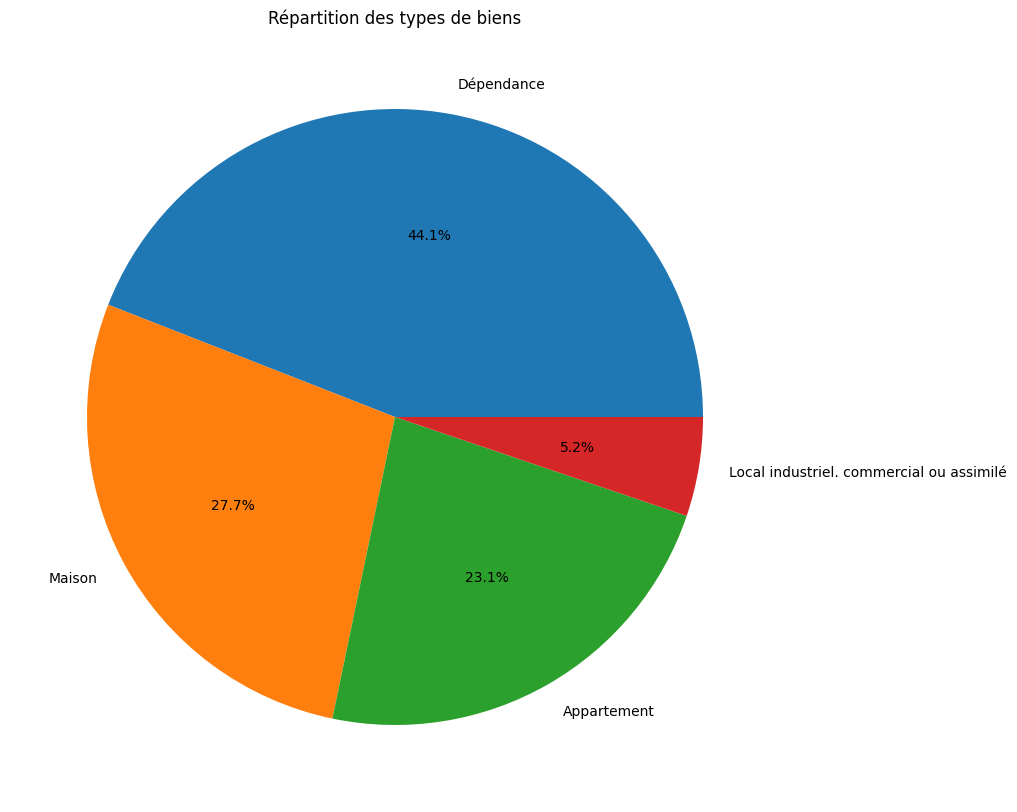

In [ ]:
type_counts = data['Type local'].value_counts()

print(type_counts)

type_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(10,10))
plt.ylabel('')
plt.title('Répartition des types de biens')
plt.show()